In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,plot_roc_curve

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [9]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [10]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [11]:
# EDA and Data Preprocessing

In [12]:
numerical_columns=['Age' ,'Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [13]:
train[numerical_columns].head()

,Age,Annual_Premium,Vintage
0,44,40454.0,217
1,76,33536.0,183
2,47,38294.0,27
3,21,28619.0,203
4,29,27496.0,39


In [14]:
train[categorical_columns].head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response
0,Male,1,28.0,0,> 2 Years,Yes,1
1,Male,1,3.0,0,1-2 Year,No,0
2,Male,1,28.0,0,> 2 Years,Yes,1
3,Male,1,11.0,1,< 1 Year,No,0
4,Female,1,41.0,1,< 1 Year,No,0


In [15]:
#Age

Text(0.5, 1.0, 'Age Distribution')

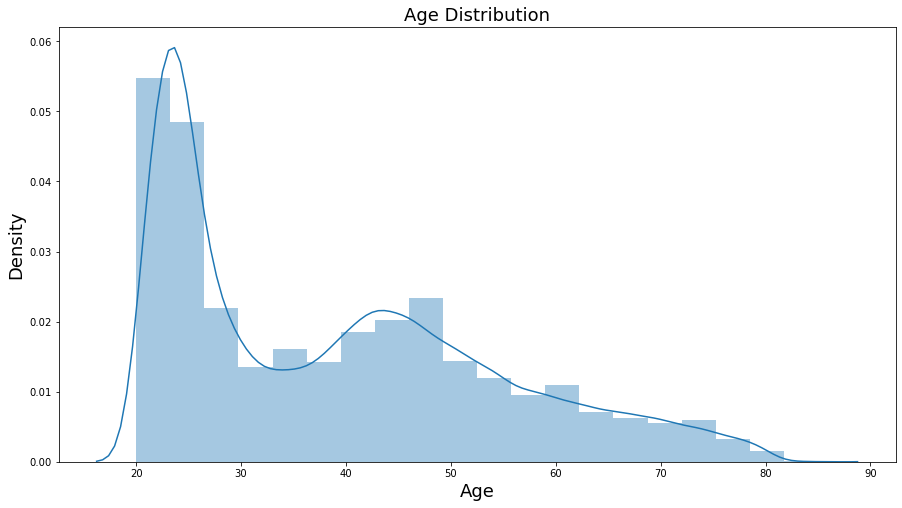

In [16]:
plt.figure(figsize=(15,8))

sns.distplot(train.Age,bins=20)
plt.xlabel("Age",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("Age Distribution",fontsize=18)

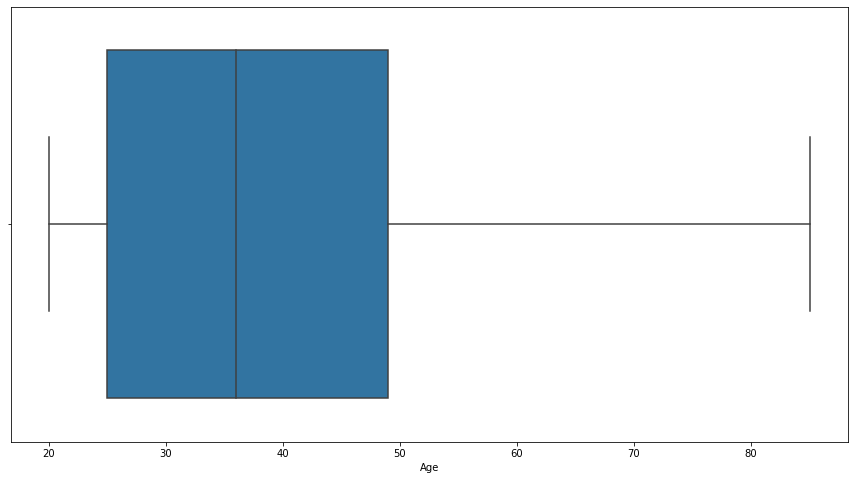

In [17]:
plt.figure(figsize=(15,8))

sns.boxplot(x="Age",data=train)

In [18]:
# Annual Premium

Text(0.5, 1.0, 'Annual Premium Distribution')

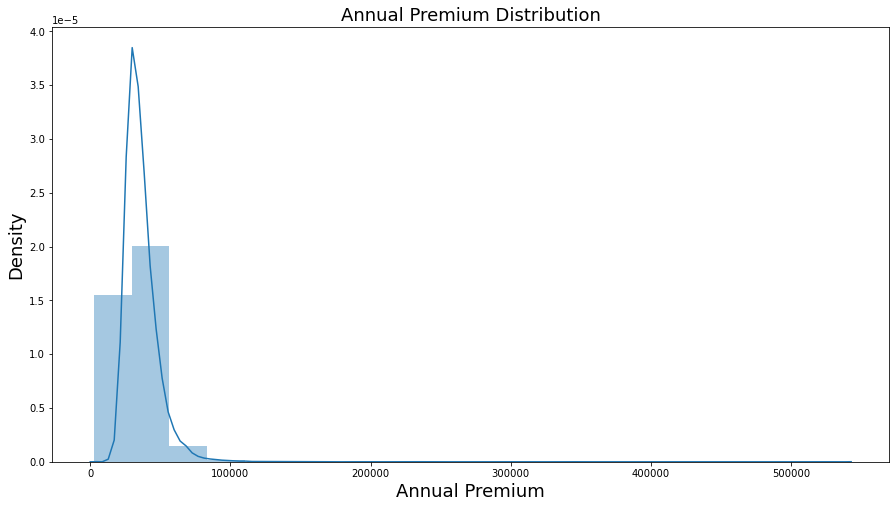

In [19]:
plt.figure(figsize=(15,8))

sns.distplot(train.Annual_Premium,bins=20)
plt.xlabel("Annual Premium",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("Annual Premium Distribution",fontsize=18)

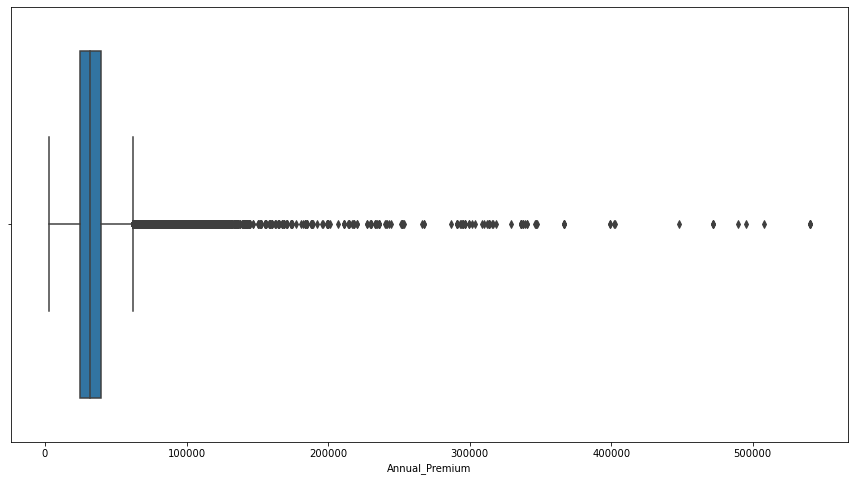

In [20]:
plt.figure(figsize=(15,8))

sns.boxplot(x="Annual_Premium",data=train)

In [21]:
# Age vs Annual Salary

Text(0.5, 1.0, 'Age vs Annual Premium')

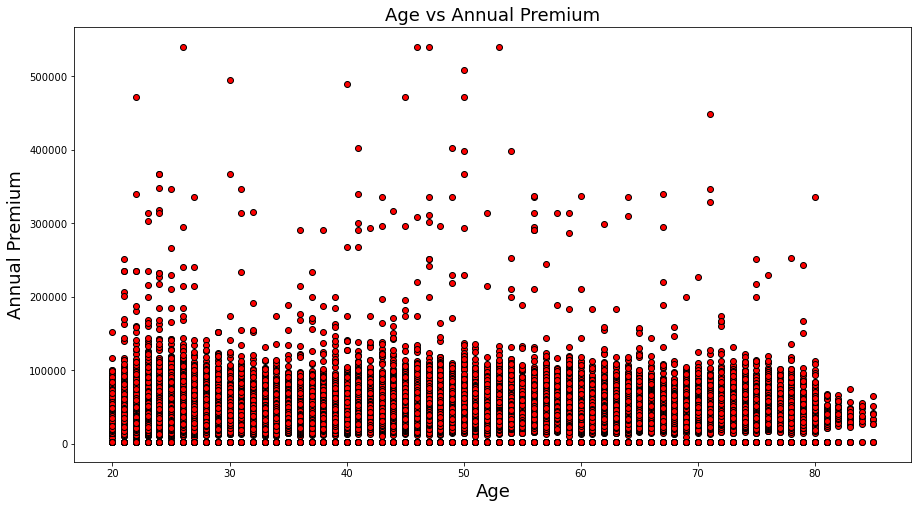

In [22]:
plt.figure(figsize=(15,8))

plt.scatter(train.Age,train.Annual_Premium,color="red",edgecolor="k")
plt.xlabel("Age",fontsize=18)
plt.ylabel("Annual Premium",fontsize=18)
plt.title("Age vs Annual Premium",fontsize=18)

Text(0.5, 1.0, 'Age vs Avg Annual Premium')

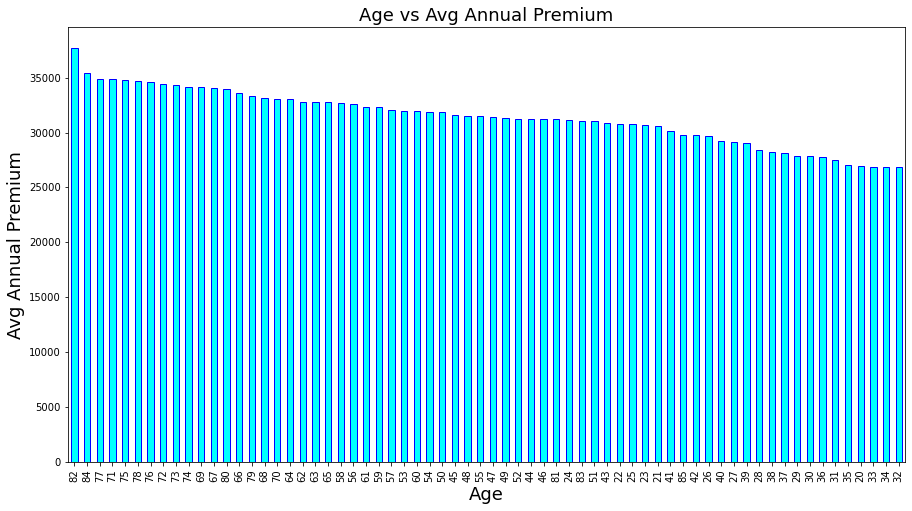

In [23]:
plt.figure(figsize=(15,8))

train.groupby("Age")["Annual_Premium"].mean().sort_values(ascending=False).plot(kind="bar",color="aqua",edgecolor="b")
plt.xlabel("Age",fontsize=18)
plt.ylabel("Avg Annual Premium",fontsize=18)
plt.title("Age vs Avg Annual Premium",fontsize=18)

In [24]:
#Gender and Respnse

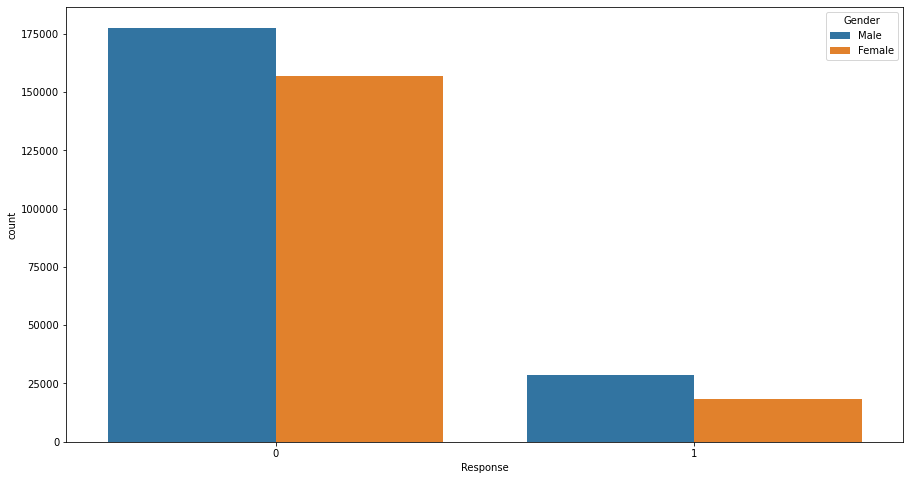

In [25]:
plt.figure(figsize=(15,8))

sns.countplot(train["Response"],hue=train.Gender)


In [26]:
# Driving License

Text(0.5, 1.0, 'Gender vs Driving License')

<Figure size 1080x576 with 0 Axes>

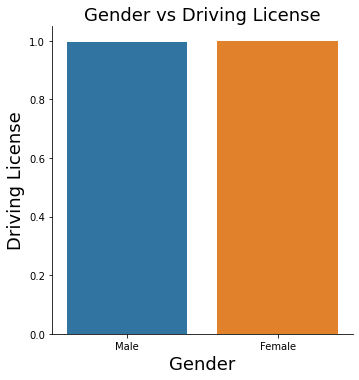

In [27]:
plt.figure(figsize=(15,8))

sns.catplot(x="Gender",y="Driving_License",data=train,kind="bar")

plt.xlabel("Gender",fontsize=18)
plt.ylabel("Driving License",fontsize=18)
plt.title("Gender vs Driving License",fontsize=18)

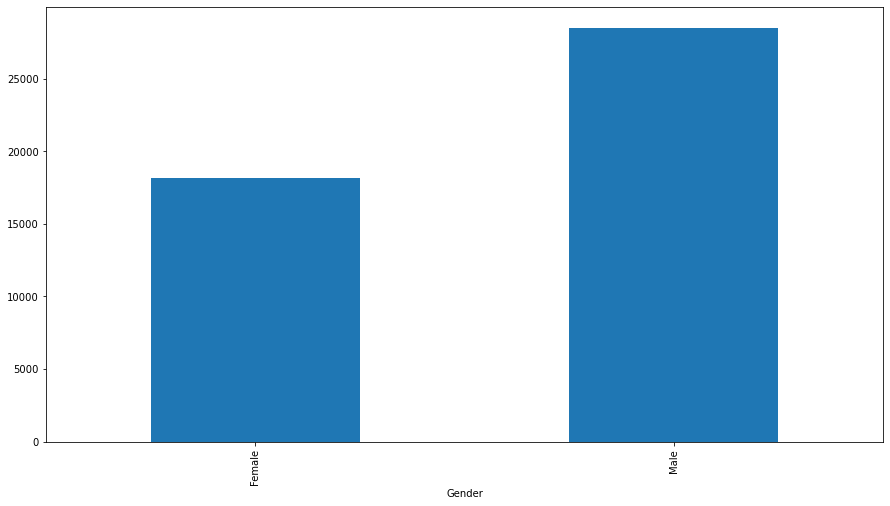

In [28]:
# Genderwise count of Driving License having response =1 
plt.figure(figsize=(15,8))

train[train.Response==1].groupby("Gender")["Driving_License"].count().plot(kind="bar")


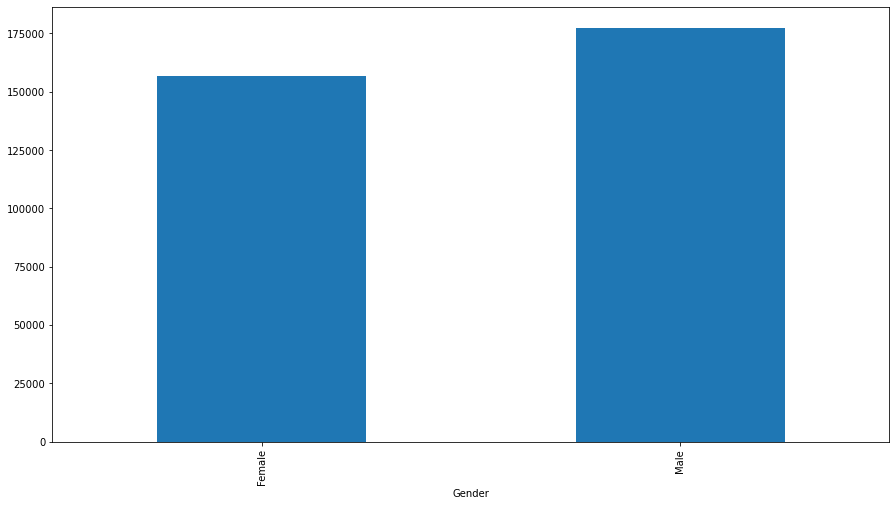

In [29]:
# Genderwise count of Driving License having response =0
plt.figure(figsize=(15,8))

train[train.Response==0].groupby("Gender")["Driving_License"].count().plot(kind="bar")


In [30]:
# Vehicle Age

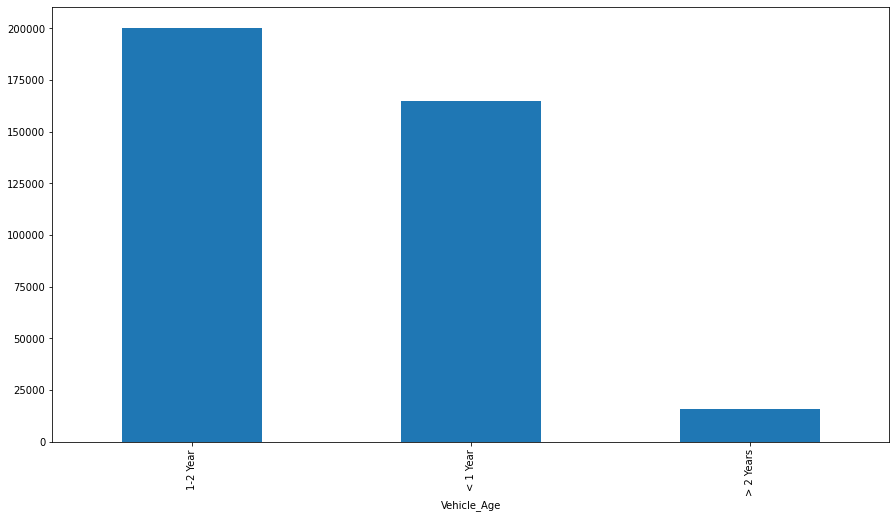

In [31]:
plt.figure(figsize=(15,8))

train.groupby("Vehicle_Age")["Response"].count().plot(kind="bar")


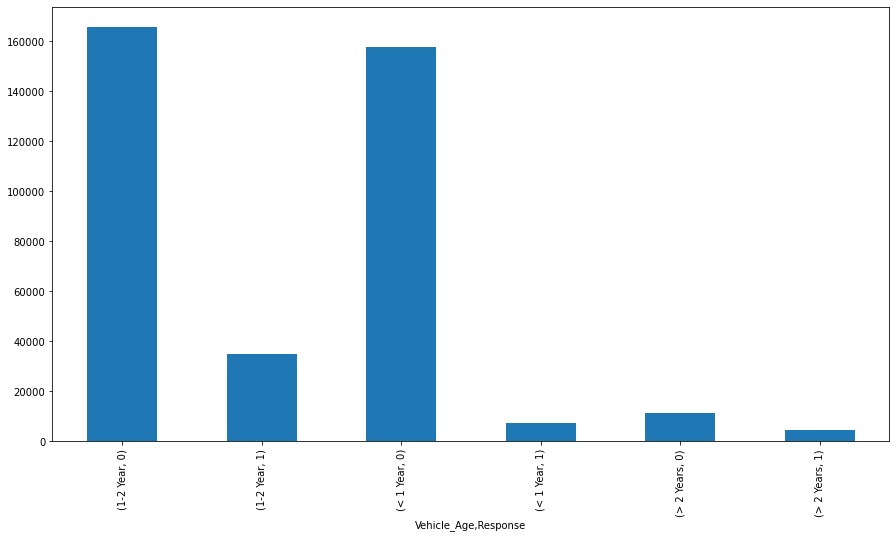

In [32]:
# Vehicle Age and Response

plt.figure(figsize=(15,8))

train.groupby(["Vehicle_Age","Response"])["id"].count().plot(kind="bar")

<Figure size 1080x576 with 0 Axes>

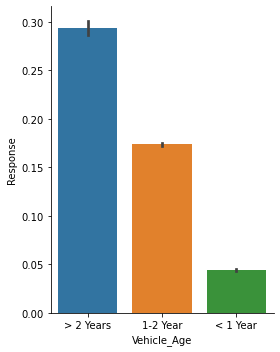

In [33]:
plt.figure(figsize=(15,8))

sns.catplot(x="Vehicle_Age",y="Response",data=train,kind="bar",aspect=0.8)

In [34]:
# Damaged Vehicle

<Figure size 1080x576 with 0 Axes>

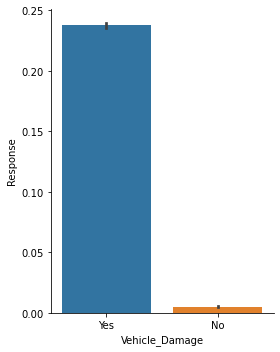

In [35]:
plt.figure(figsize=(15,8))

sns.catplot(x="Vehicle_Damage",y="Response",data=train,kind="bar",aspect=0.8)

In [36]:
# Vintage : No. of days customer is associated with the company

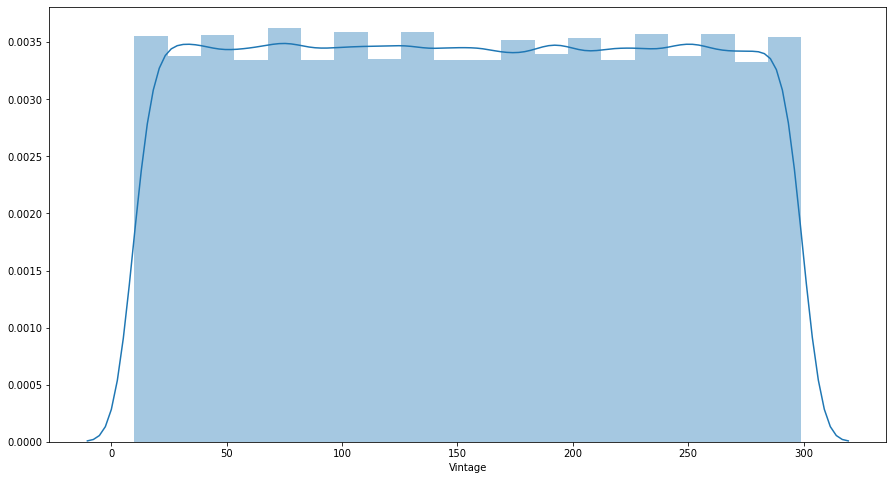

In [37]:
plt.figure(figsize=(15,8))

sns.distplot(train.Vintage,bins=20)

In [38]:
# Data Preprocessing

In [39]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [40]:
# Handling the categorical columns

train["Gender"] = train["Gender"].map({"Female":0,"Male":1})
test["Gender"] = test["Gender"].map({"Female":0,"Male":1})


In [41]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [42]:
train["Vehicle_Age"] = train["Vehicle_Age"].map({"< 1 Year":0,"1-2 Year":1,"> 2 Years":2})
test["Vehicle_Age"] = test["Vehicle_Age"].map({"< 1 Year":0,"1-2 Year":1,"> 2 Years":2})

In [43]:
train["Vehicle_Damage"] = train["Vehicle_Damage"].map({"Yes":1,"No":0})
test["Vehicle_Damage"] = test["Vehicle_Damage"].map({"Yes":1,"No":0})

In [44]:
# Lets Scale Numerical Data

sc = StandardScaler()

train[["Age","Vintage"]] = sc.fit_transform(train[["Age","Vintage"]])
test[["Age","Vintage"]] = sc.fit_transform(test[["Age","Vintage"]])

In [45]:
mm =MinMaxScaler()

train[["Annual_Premium"]] = mm.fit_transform(train[["Annual_Premium"]])
test[["Annual_Premium"]] = mm.fit_transform(test[["Annual_Premium"]])

In [46]:
train.drop("id",axis=1,inplace=True)
test.drop("id",axis=1,inplace=True)

In [47]:
# Model Building

In [48]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
import xgboost as xgb

In [49]:
# train test split

x_train = train.drop("Response",axis=1)
y_train = train["Response"]


In [50]:
# XGBOOST


xgb_clf=xgb.XGBClassifier(n_estimators = 300, max_depth = 5, gamma = 4.0388607178326605, reg_lambda = 0.26955899476862166,
                            reg_alpha = 66.0, min_child_weight=4.0,colsample_bytree = 0.8844758548525424 )


In [51]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8844758548525424,
              gamma=4.0388607178326605, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=4.0, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=66.0,
              reg_lambda=0.26955899476862166, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

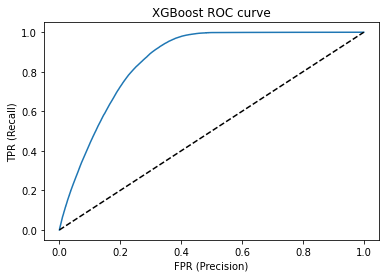

Area under curve (AUC):  0.8580627002652994


In [52]:
predict = xgb_clf.predict_proba(x_train)[:,1]

fpr,tpr,_ =roc_curve(y_train,predict) 

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))